## Meridional transport (not angle corrected) of tracer vs. meridional velocity across shelf break

In [1]:
#KRM

import numpy as np

import matplotlib.pyplot as plt

import matplotlib.colors as mcolors

from math import *

import scipy.io

import scipy as spy

%matplotlib inline

from netCDF4 import Dataset

import pylab as pl

import os 

import sys

import seaborn as sns

In [2]:
lib_path = os.path.abspath('../../Building_canyon/BuildCanyon/PythonModulesMITgcm') # Add absolute path to my python scripts
sys.path.append(lib_path)

import ReadOutTools_MITgcm as rout 

import ShelfBreakTools_MITgcm as sb


In [3]:
CanyonGrid='/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_3Tr_LinProfiles_BarkleyHyd_GMREDI_FluxDiagnostics/run01/gridGlob.nc'
CanyonGridOut = Dataset(CanyonGrid)
#for dimobj in CanyonGridOut.variables.values():
#    print dimobj

CanyonState='/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_3Tr_LinProfiles_BarkleyHyd_GMREDI_FluxDiagnostics/run01/stateGlob.nc'
CanyonStateOut = Dataset(CanyonState)

CanyonTracer='/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_3Tr_LinProfiles_BarkleyHyd_GMREDI_FluxDiagnostics/run01/ptracersGlob.nc'

FluxTH = '/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_3Tr_LinProfiles_BarkleyHyd_GMREDI_FluxDiagnostics/run01/FluxTHGlob.nc'
FluxSLT = '/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_3Tr_LinProfiles_BarkleyHyd_GMREDI_FluxDiagnostics/run01/FluxSLTGlob.nc'
FluxTR01 = '/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_3Tr_LinProfiles_BarkleyHyd_GMREDI_FluxDiagnostics/run01/FluxTR01Glob.nc'
FluxTR02 = '/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_3Tr_LinProfiles_BarkleyHyd_GMREDI_FluxDiagnostics/run01/FluxTR02Glob.nc'
FluxOut = Dataset(FluxTR02)

CanyonGridNoC='/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_3Tr_LinProfiles_BarkleyHyd_GMREDI_FluxDiagnostics/run02/gridGlob.nc'
CanyonGridOutNoC = Dataset(CanyonGridNoC)

FluxTR01NoC = '/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_3Tr_LinProfiles_BarkleyHyd_GMREDI_FluxDiagnostics/run02/FluxTR01Glob.nc'
FluxTR02NoC = '/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_3Tr_LinProfiles_BarkleyHyd_GMREDI_FluxDiagnostics/run02/FluxTR02Glob.nc'


In [4]:
# General input
nx = 360
ny = 360
nz = 90
nt = 19 # t dimension size 

z = CanyonStateOut.variables['Z']
#print(z[10])
Time = CanyonStateOut.variables['T']
#print(Time[:])

xc = rout.getField(CanyonGrid, 'XC') # x coords tracer cells

yc = rout.getField(CanyonGrid, 'YC') # y coords tracer cells

bathy = rout.getField(CanyonGrid, 'Depth')

hFacC = rout.getField(CanyonGrid, 'HFacC')
MaskC = rout.getMask(CanyonGrid, 'HFacC')

hFacCNoC = rout.getField(CanyonGridNoC, 'HFacC')
MaskCNoC = rout.getMask(CanyonGridNoC, 'HFacC')

dxF = rout.getField(CanyonGrid, 'dxF')
drF = CanyonGridOut.variables['drF']

In [5]:
sns.set()
sns.set_style('white')
sns.set_context('notebook')

### Tracer 1

In [6]:
ADVyTR01 = rout.getField(FluxTR01,'ADVyTr01') # Meridional advective transport 

DFyETR01 = rout.getField(FluxTR01,'DFyETr01') # Meridional diff flux implicit

VTRAC01NoC = rout.getField(FluxTR01NoC,'VTRAC01') # 

VTRAC01 = rout.getField(FluxTR01,'VTRAC01') # 

ADVyTR01NoC = rout.getField(FluxTR01NoC,'ADVyTr01') # Meridional advective transport 

DFyETR01NoC = rout.getField(FluxTR01NoC,'DFyETr01') # Meridional diff flux implicit

V = rout.getField(CanyonState,'V') # Meridional velocity

In [7]:
VTRACPlot = sb.FluxSB(4,VTRAC01,z,xc,29,hFacC,MaskC)
print(np.shape(VTRACPlot))





(90, 362)


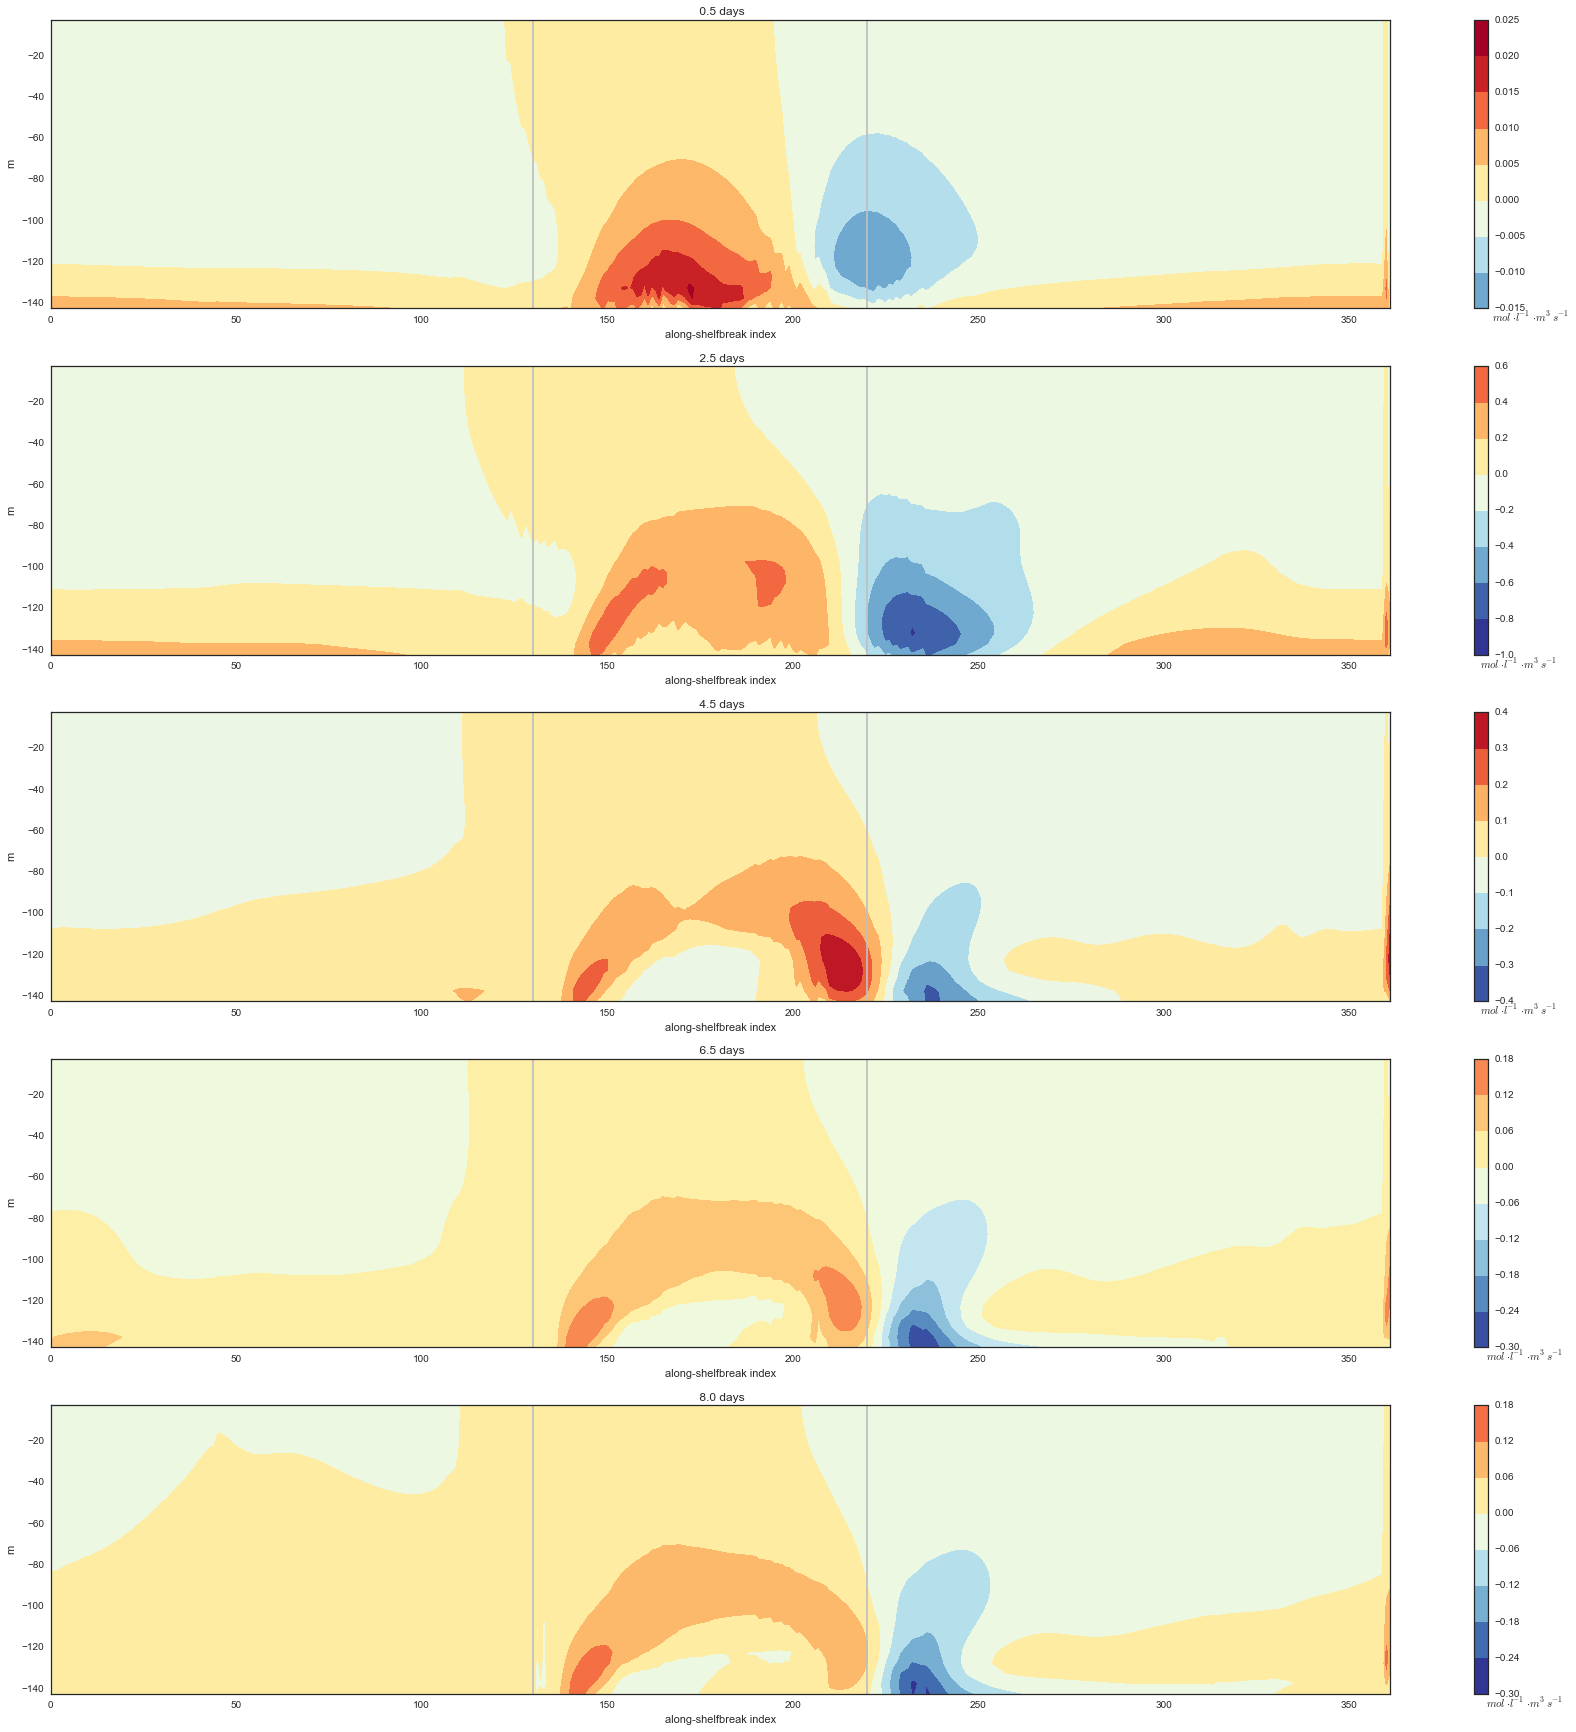

In [8]:
times = [0,4,8,12,15] # First time element of flux is at 43200 sec, and las at 8 days 

figSize=(30,30)
numCols = 1
numRows = 5
zlev = 29
unitsTr = '$mol \cdot l^{-1}\cdot m^3s^{-1}$'
kk=1

fig44 = plt.figure(figsize=figSize)

for tt in times:
    VTRACPlot = sb.FluxSB(tt,VTRAC01,z,xc,zlev,hFacC,MaskC)
    
    sb.contourfFluxSB(tt,numCols,numRows,VTRACPlot,z,xc,unitsTr, 0,29,kk,zlev)
    
    
    kk = kk+1

    
   

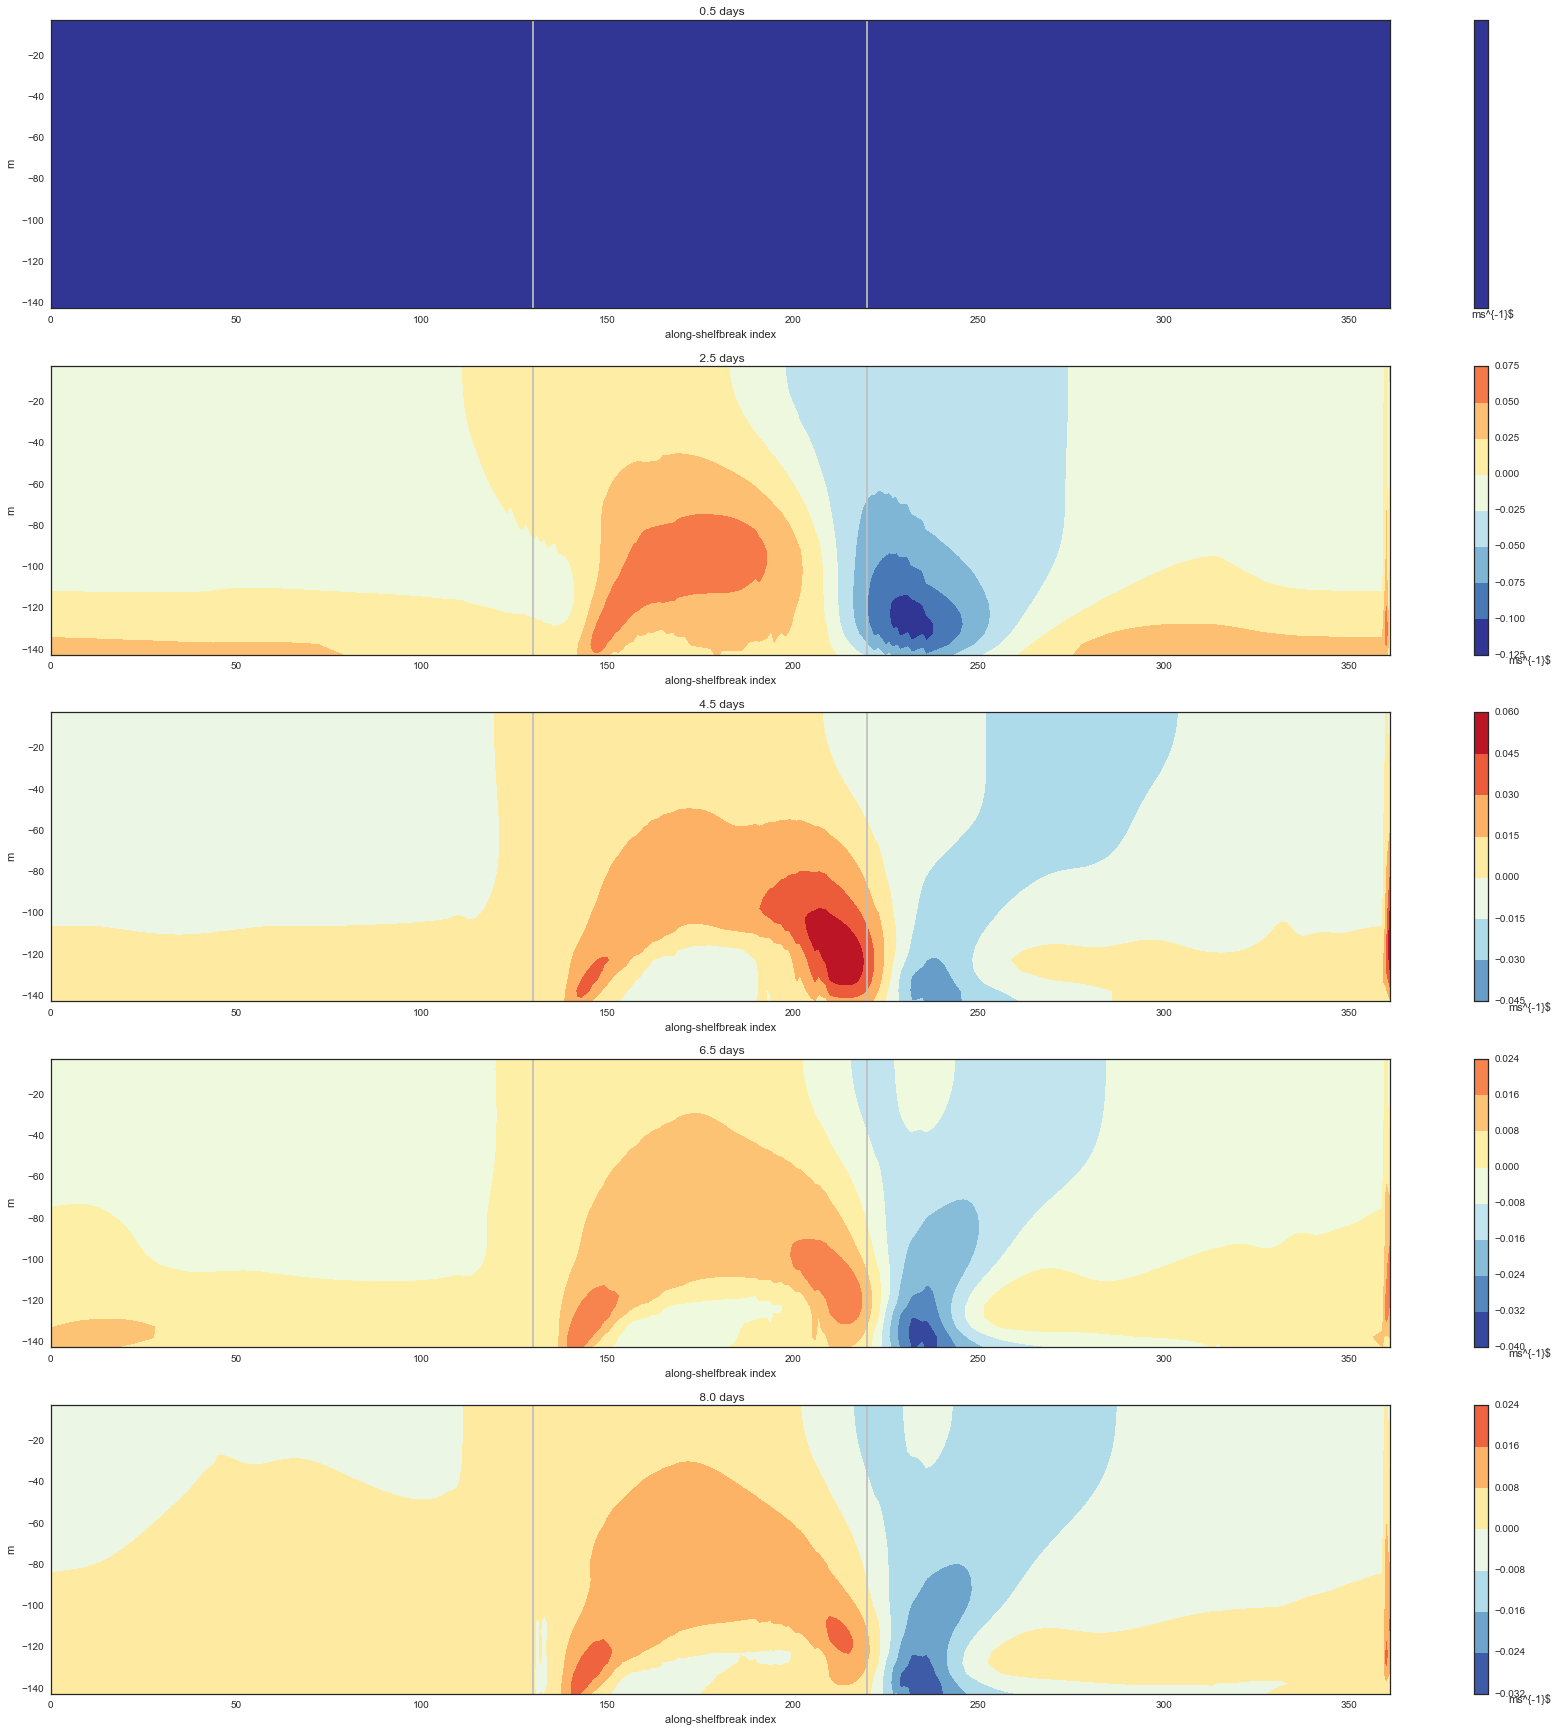

In [9]:
times = [0,4,8,12,15] # First time element of flux is at 43200 sec, and las at 8 days 

figSize=(30,30)
numCols = 1
numRows = 5
zlev = 29
unitsTr = 'ms^{-1}$'
kk=1

fig44 = plt.figure(figsize=figSize)

for tt in times:
    VPlot = sb.FluxSB(tt,V,z,xc,zlev,hFacC,MaskC)
    
    sb.contourfFluxSB(tt,numCols,numRows,VPlot,z,xc,unitsTr, 0,29,kk,zlev)
    
    
    kk = kk+1

    
 

In [10]:
Tr01 = rout.getField(CanyonTracer,'Tr1') 

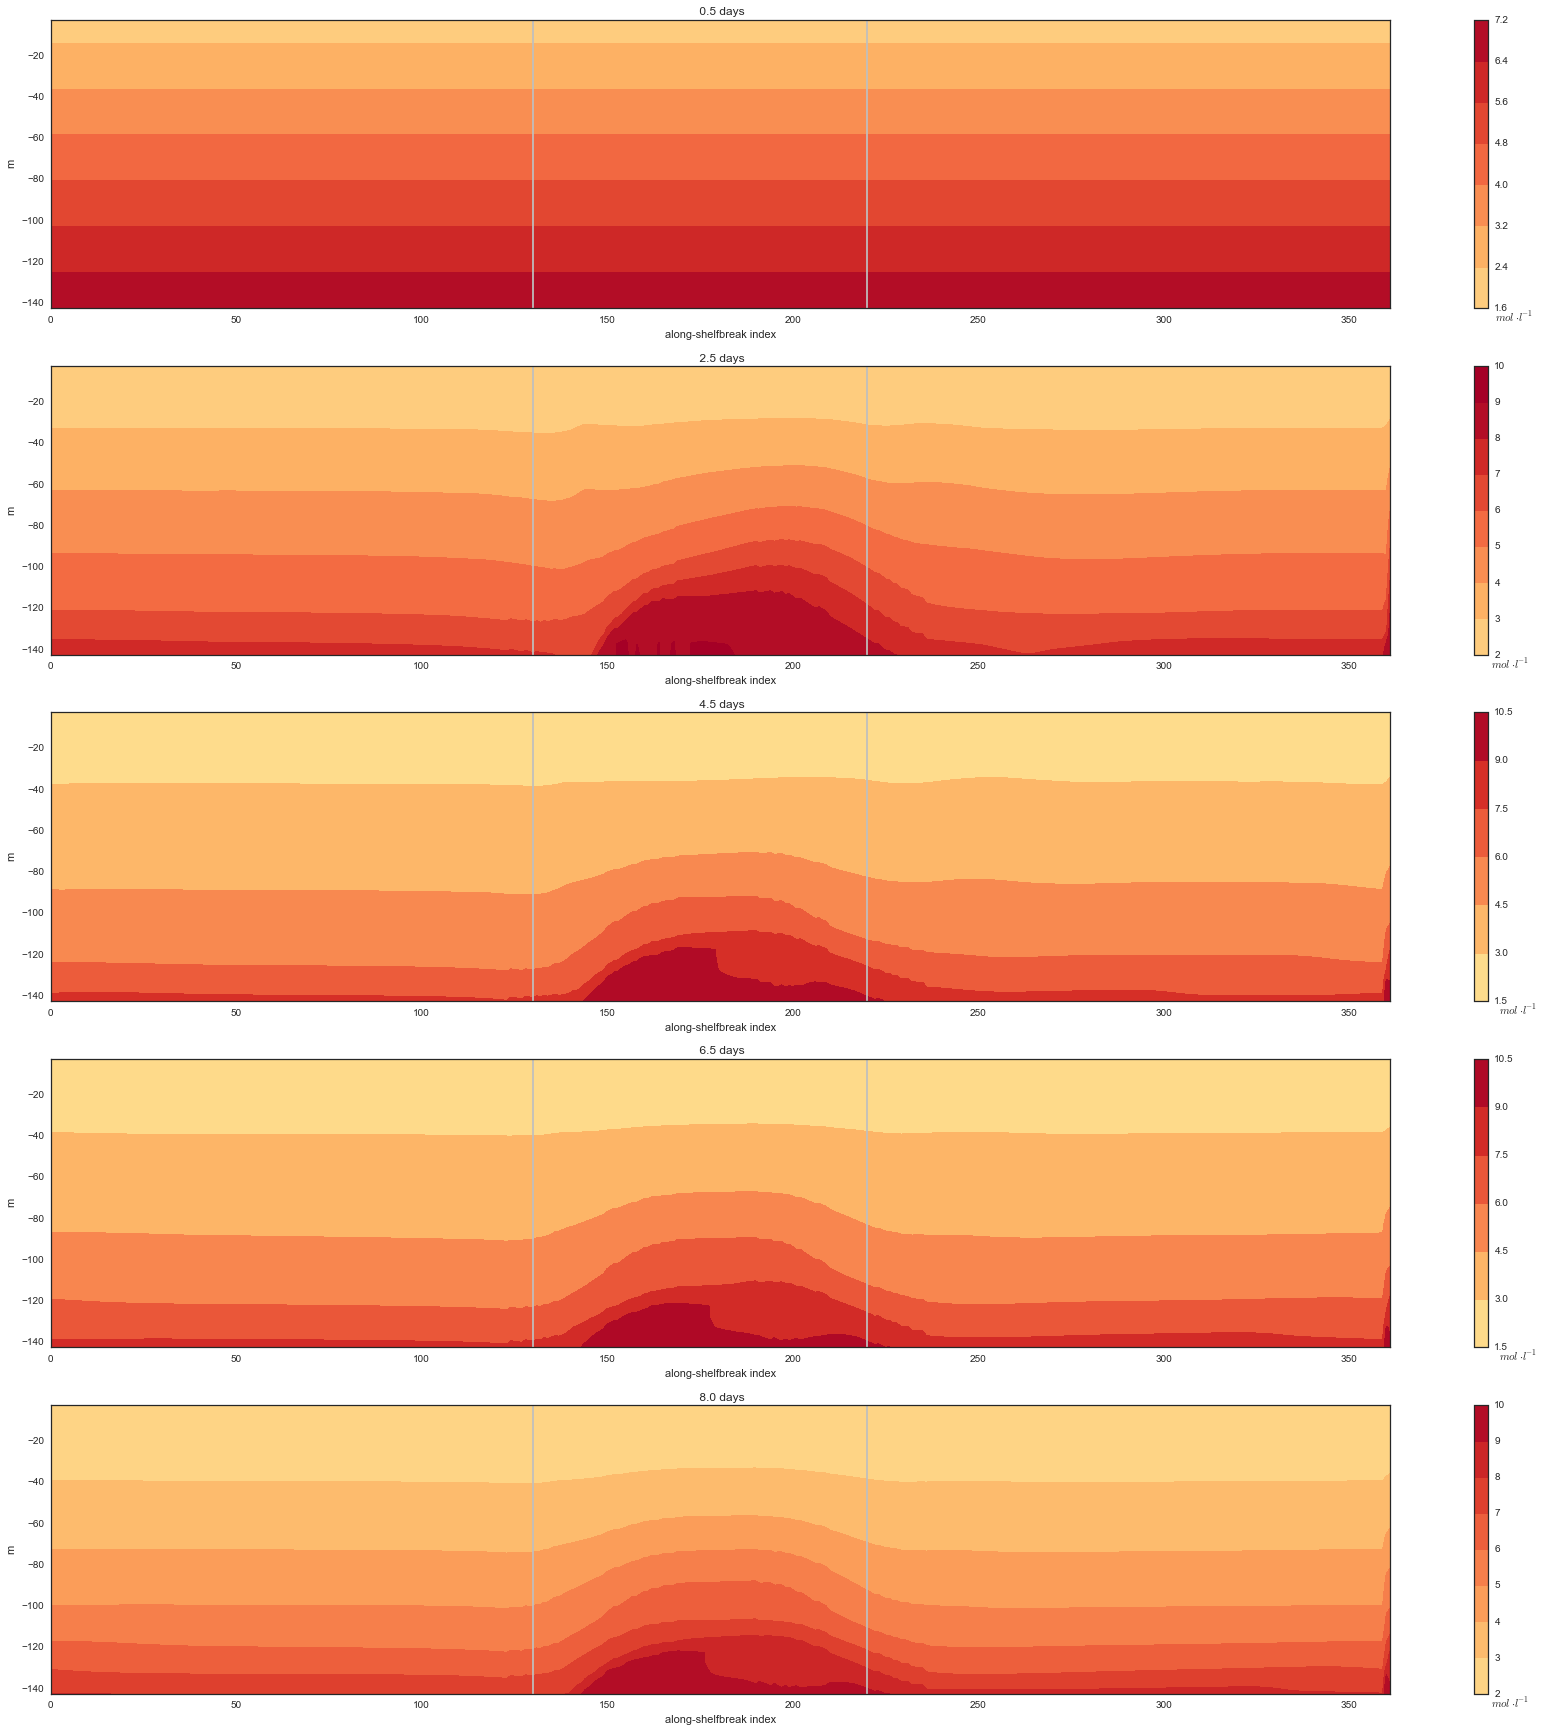

In [11]:
times = [0,4,8,12,15] # First time element of flux is at 43200 sec, and las at 8 days 

figSize=(30,30)
numCols = 1
numRows = 5
zlev = 29
unitsTr = '$mol \cdot l^{-1}$'
kk=1

fig44 = plt.figure(figsize=figSize)

for tt in times:
    TrPlot = sb.fieldSB(tt,Tr01,z,xc,zlev,hFacC,MaskC)
    sb.contourfFluxSB(tt,numCols,numRows,TrPlot,z,xc,unitsTr, 0,29,kk,zlev)
    
    
    kk = kk+1

    
 

In [12]:
areaSB = sb.AreaWallSB(hFacC,drF,dxF,zlev)
print (np.shape(V))

(19, 90, 361, 360)


(90, 360)


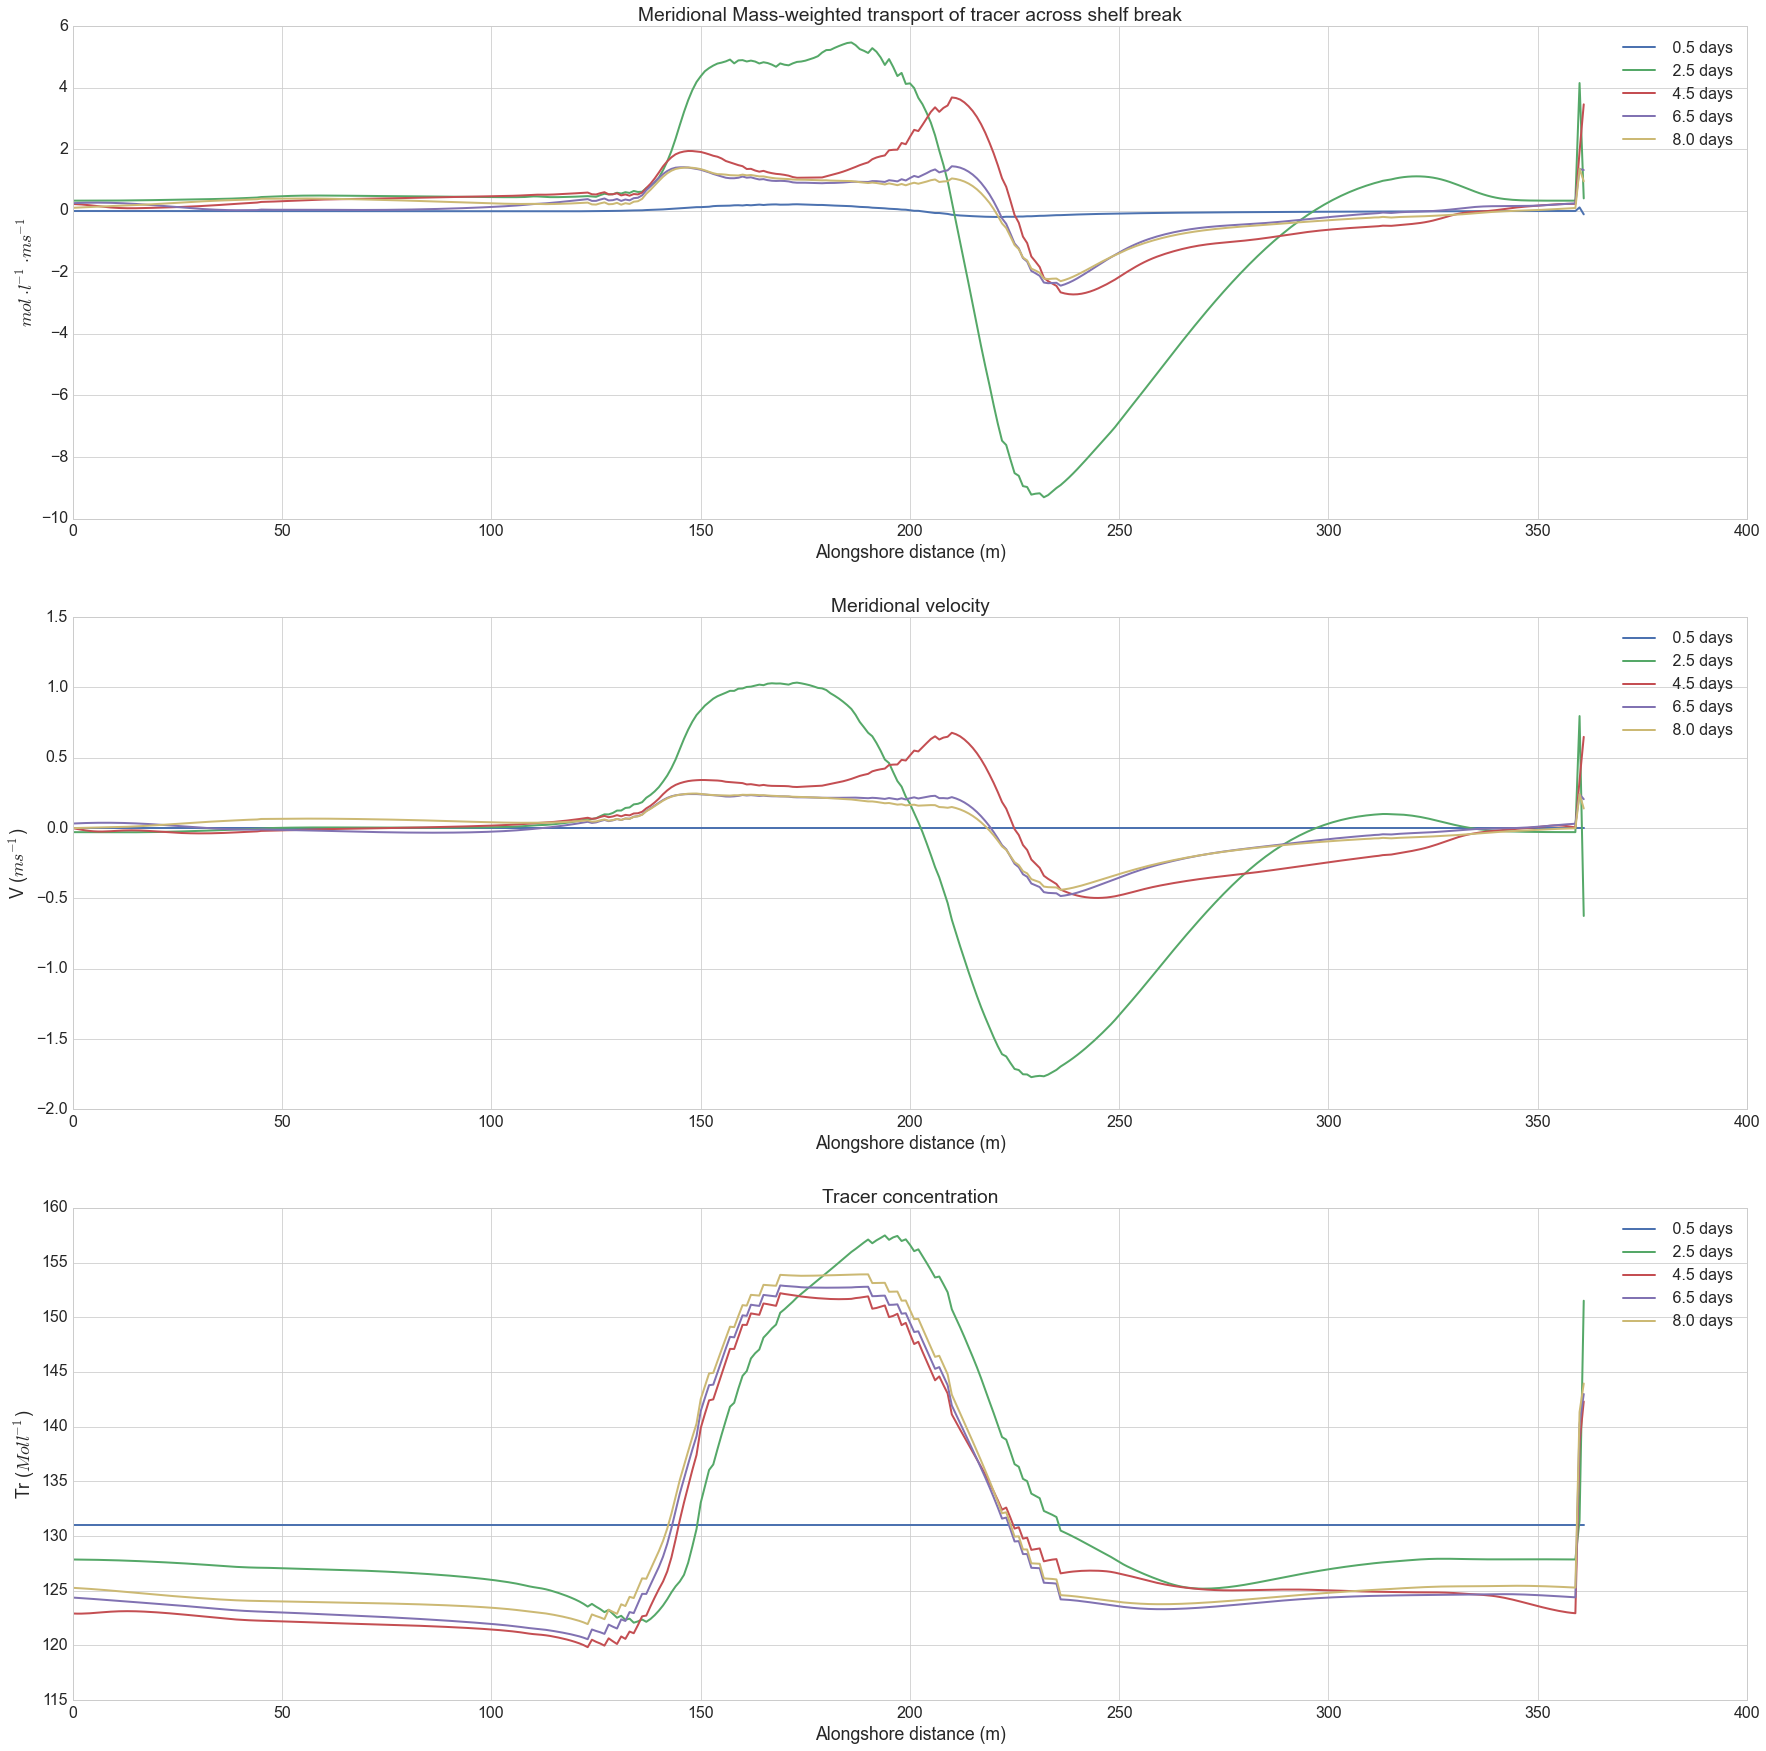

In [13]:
sns.set(context='paper', style='whitegrid', font='sans-serif', font_scale=2, rc={"lines.linewidth": 2.5})
times = [0,4,8,12,15] # First time element of flux is at 43200 sec, and las at 8 days 

figSize=(30,30)
numCols = 1
numRows = 3
zlev = 29
unitsTr = '$mol \cdot l^{-1}\cdot ms^{-1}$'
unitsTr2 = '$mol \cdot l^{-1}\cdot m^3s^{-1}$'

areaSB = sb.AreaWallSB(hFacC,drF,dxF,zlev)
print(np.shape(areaSB))
kk=1

fig44 = plt.figure(figsize=figSize)

for tt in times:
    FluxPlot = sb.FluxSB(tt,VTRAC01,z,xc,zlev,hFacC,MaskC)
    plt.subplot(numRows,numCols,1)
    ax = plt.gca()
    ax.plot(np.sum(FluxPlot[:29,:],axis=0),linewidth=2,label = (" %1.1f days " % ((tt/2.)+0.5)))
    plt.legend(loc=0)
    plt.xlabel('Alongshore distance (m)')
    plt.ylabel(unitsTr)
    plt.title('Meridional Mass-weighted transport of tracer across shelf break')
    
    VPlot = sb.FluxSB(tt,V,z,xc,zlev,hFacC,MaskC)
    
    
    plt.subplot(numRows,numCols,2)
    ax = plt.gca()
    ax.plot(np.sum(VPlot[:29,:],axis=0),linewidth=2,label = (" %1.1f days " % ((tt/2.)+0.5)))
    plt.legend(loc=0)
    plt.xlabel('Alongshore distance (m)')
    plt.ylabel('V ($ms^{-1}$)')
    plt.title('Meridional velocity ')

    
    TrPlot = sb.fieldSB(tt,Tr01,z,xc,zlev,hFacC,MaskC)
    plt.subplot(numRows,numCols,3)
    ax = plt.gca()
    ax.plot(np.sum(TrPlot[:29,:],axis=0),linewidth=2,label = (" %1.1f days " % ((tt/2.)+0.5)))
    plt.legend(loc=0)
    plt.xlabel('Alongshore distance (m)')
    plt.ylabel('Tr ($Mol l^{-1} $)')
    plt.title('Tracer concentration  ')


### NOTES
* I have to fix those spikes that come from the mask and the way the function is finding the shelf break.

* The behaviour of the vertially integrated meridional velocity 'explains' a large part of the behaviour of the total tracer transport. very coherent throughout time. 

* The spread outside the canyon is more compatible with the concentration.

* The extra bump after 2.5 days near the downstream side of the canyon comes from high concetrations there


